# Project Report for Banana Collection Navigation


### Required Libraries

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent

### The Environment

In [13]:
env = UnityEnvironment(file_name="../Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [15]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### The State and Action Spaces and the learning algorithm

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Similar to the DQN Nature paper, "Human-level control through deep reinforcement learning", the adopted learning algorithm is a vanilla Deep Q Learning. However, fully connected neural layer is used instead of convolutional neural network since the input vector is state spaces instead of image: 

Fully connected layer 1: with input = 37 state spaces and output = 128 state spaces
Fully connected layer 2: with input = 128 and output = 64
Fully connected layer 3: with input = 64 and output = 4, (for each of the 4 actions)

Parameters used in DQN algorithm:

Maximum steps per episode: 1000
Starting epsilion: 1.0
Ending epsilion: 0.01
Epsilion decay rate: 0.999, 0.995, 0.996, 0.9, 0.8 were tried. 

### The DQN Agent

In [16]:
def dqn(agent, n_episodes=5000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.8, train=True):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get next state
            reward = env_info.rewards[0]                   # get reward
            done = env_info.local_done[0]                  # check whether episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth')
            break
    return scores

## The Results

### The Untrained Agent Performance

![untrained agent](untrained_agent.gif)

### The Trained Agent Performance

![trained agent](trained_agent.gif)

### With Decay rate, eps_decay = 0.999

Episode 100	Average Score: 0.05
Episode 200	Average Score: 0.345
Episode 300	Average Score: 1.45
Episode 400	Average Score: 2.16
Episode 500	Average Score: 3.24
Episode 600	Average Score: 4.52
Episode 700	Average Score: 4.88
Episode 800	Average Score: 6.67
Episode 900	Average Score: 7.21
Episode 1000	Average Score: 7.69
Episode 1100	Average Score: 8.54
Episode 1200	Average Score: 9.22
Episode 1300	Average Score: 9.90
Episode 1400	Average Score: 10.00
Episode 1500	Average Score: 11.52
Episode 1600	Average Score: 11.12
Episode 1700	Average Score: 11.18
Episode 1800	Average Score: 11.12
Episode 1900	Average Score: 11.90
Episode 2000	Average Score: 11.45
Episode 2059	Average Score: 13.00
Environment solved in 1959 episodes!	Average Score: 13.00


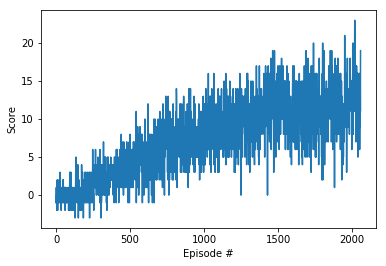

In [7]:
agent  =  Agent(state_size = state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### With Decay rate, eps_decay = 0.995

Episode 100	Average Score: 0.53
Episode 200	Average Score: 3.80
Episode 300	Average Score: 6.15
Episode 400	Average Score: 8.83
Episode 500	Average Score: 12.73
Episode 509	Average Score: 13.00
Environment solved in 409 episodes!	Average Score: 13.00


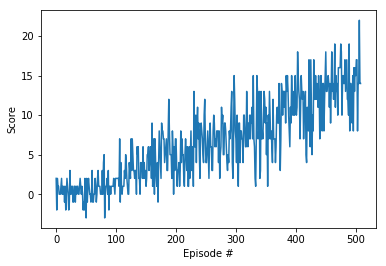

In [9]:
agent  =  Agent(state_size = state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### With Decay rate, eps_decay = 0.996

Episode 100	Average Score: 0.47
Episode 200	Average Score: 3.06
Episode 300	Average Score: 6.82
Episode 400	Average Score: 8.54
Episode 500	Average Score: 10.82
Episode 600	Average Score: 12.74
Episode 622	Average Score: 13.00
Environment solved in 522 episodes!	Average Score: 13.00


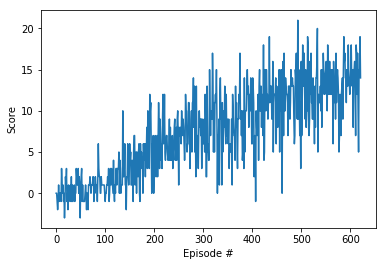

In [6]:
# eps_decay = 0.996
agent  =  Agent(state_size = state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### With Decay rate, eps_decay = 0.96

Episode 100	Average Score: 2.93
Episode 200	Average Score: 8.84
Episode 300	Average Score: 10.98
Episode 373	Average Score: 13.00
Environment solved in 273 episodes!	Average Score: 13.00


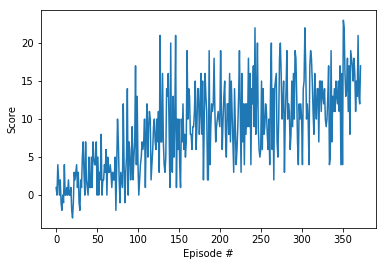

In [8]:
agent  =  Agent(state_size = state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### With Decay rate, eps_decay = 0.9

Episode 100	Average Score: 3.64
Episode 200	Average Score: 7.50
Episode 300	Average Score: 12.64
Episode 312	Average Score: 13.06
Environment solved in 212 episodes!	Average Score: 13.06


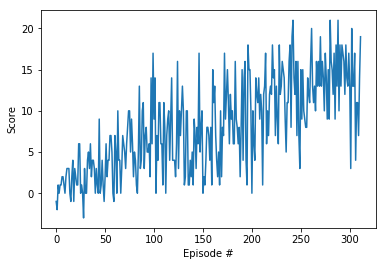

In [10]:
agent  =  Agent(state_size = state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### With Decay rate, eps_decay = 0.8

Episode 100	Average Score: 3.99
Episode 200	Average Score: 8.19
Episode 300	Average Score: 11.91
Episode 367	Average Score: 13.00
Environment solved in 267 episodes!	Average Score: 13.00


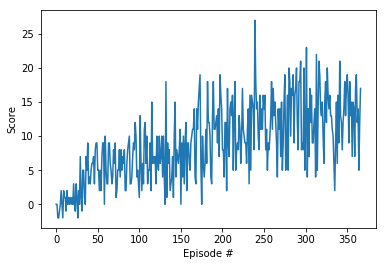

In [17]:
agent  =  Agent(state_size = state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## With Decay rate, eps_decay = 0.8 and Average score > 15

Episode 100	Average Score: 4.47
Episode 200	Average Score: 11.27
Episode 300	Average Score: 14.26
Episode 334	Average Score: 15.01
Environment solved in 234 episodes!	Average Score: 15.01


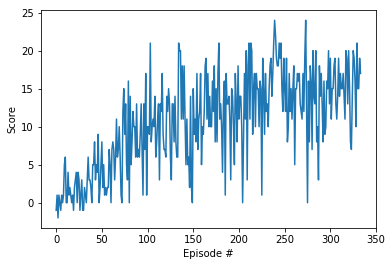

In [21]:
# eps_decay = 0.8
agent  =  Agent(state_size = state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Result Summary and Future work

By changing the reward decay rate, a change of training time required to solve the problem is observed. The lower the decay, the faster it is the solution.  However, higher fluctuation of average score is also observed. I realized to balance training time and lower fluctuation of score fluctuation, the decay rate of 0.995 looks optimum. Also, I have tried amending the average score threshold to 15 and it is achievable within reasonable time period under 0.8 decay rate. 

To pickup more yellow bananas and achieve higher score, I suggest using a convolutional neural network DQN with Learning from pixels. The other DQN models mentioned can also be the learning algorithm worthy for trial. 

1. Double Deep Q-learning
2. Dueling Deep Q-learning
3. Prioritized Experience Replay Deep Q-learning
4. Distributional deep Q-learning
5. A rainbow combination of Deep Q-learning algorithms